306
319
50


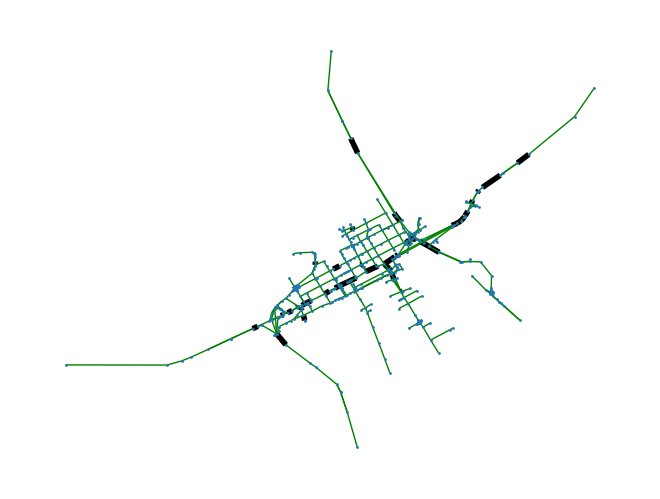

In [11]:
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys
import import_ipynb
%run ./Data_handling.ipynb
%run ./Data_visualization.ipynb
%run ./Model.ipynb
%run ./Analysis.ipynb

## Data handling

In [2]:
G1 = read_sumo_net1('../Data/s_gyor.net.xml') # type: ignore
#G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"0.00")
#pyg_data = nx_to_pyg(G2)

In [3]:
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
data = torch.load('../Data/data.pth')
edges_to_hide = choose_hidden_edges_well(data, '../Data/s_gyor.net.xml', 3, 7, 0.3, 150)
print(len(edges_to_hide))

354


## Initialization of the model

In [12]:
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
#with open('../Data/edges_to_hide.json', 'r') as file:
#    edges_to_hide = json.load(file)
data = torch.load('../Data/data.pth')
data_train = torch.load('../Data/data_train.pth')
data_test = torch.load('../Data/data_test.pth')

prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, summa = data_preparation(data_train, data_test, edges_to_hide, False)
print(summa)


# Define the model
edge_dim = 1  # Number of edge features
hidden_dim1 = 32
hidden_dim2 = 128
hidden_dim3 = 64
hidden_dim4 = 32
hidden_dim5 = 32
hidden_dim6 = 32
hidden_dim7 = 32
hidden_dim8 = 32

model = GNN(edge_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, hidden_dim6, hidden_dim7, hidden_dim8)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

losses, total_train_losses, total_test_losses = training_the_model(model, optimizer, criterion, 1000, prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, edges_to_hide, 20)

#with open('total_losses.json', 'w') as file:
#    json.dump(total_losses, file)
#with open('losses.json', 'w') as file:
#    json.dump(losses, file)

tensor(0.0980)
Epoch 1, Loss: 0.07964394241571426
Epoch 21, Loss: 0.054640673100948334
Epoch 41, Loss: 0.0263508353382349
Epoch 61, Loss: 0.057303912937641144
Epoch 81, Loss: 0.04852940887212753
Epoch 101, Loss: 0.04932847619056702
Epoch 121, Loss: 0.051117535680532455
Epoch 141, Loss: 0.05411674082279205
Epoch 161, Loss: 0.05123114585876465
Epoch 181, Loss: 0.05181160196661949
Epoch 201, Loss: 0.051568709313869476
Epoch 221, Loss: 0.03902483731508255
Epoch 241, Loss: 0.03487428277730942
Epoch 261, Loss: 0.03996959701180458
Epoch 281, Loss: 0.046921100467443466
Epoch 301, Loss: 0.05493120849132538
Epoch 321, Loss: 0.050316035747528076
Epoch 341, Loss: 0.04970937222242355
Epoch 361, Loss: 0.04214229807257652
Epoch 381, Loss: 0.05644918978214264
Epoch 401, Loss: 0.04787465184926987
Epoch 421, Loss: 0.03378342464566231
Epoch 441, Loss: 0.03886112570762634
Epoch 461, Loss: 0.047955792397260666
Epoch 481, Loss: 0.04631388559937477
Epoch 501, Loss: 0.0473894402384758
Epoch 521, Loss: 0.05292

In [65]:
torch.save(model.state_dict(), 'gnn_model_ces.pth')
#cep : change every step
layers = [model.conv1, model.conv2, model.conv3, model.conv4, model.conv5, model.conv6, model.conv7, model.conv8]
edge_dims = []
for layer in layers:
    edge_dims.append(layer.in_channels)
edge_dims.append(model.linear.in_features)
with open('dimensions.json','w') as file:
    json.dump(edge_dims, file)


## Loading the model
Once we trained it nd saved it, this is how we can load it

In [66]:
with open('edges_to_hide.json', 'r') as file:
    edges_to_hide = json.load(file)
data = torch.load('data.pth')

prepared_training_data, prepared_test_data, summa = data_preparation(data, edges_to_hide)

with open('dimensions.json', 'r') as file:
    edge_dims = json.load(file)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('gnn_model_ces.pth'))
output = model2(prepared_training_data[3].edge_attr, prepared_training_data[3].edge_index)



<All keys matched successfully>

## Data visualization

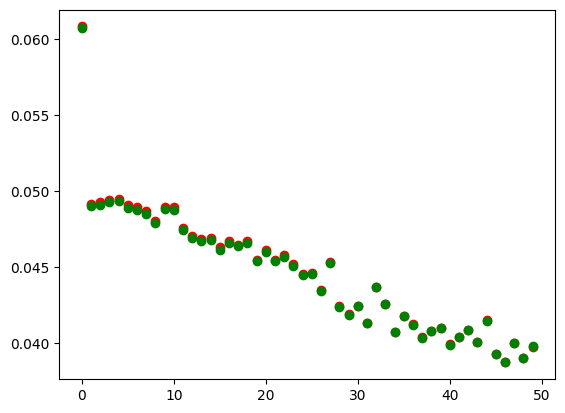

In [17]:
plt.plot(total_train_losses, 'ro', total_test_losses, 'go')
plt.show()

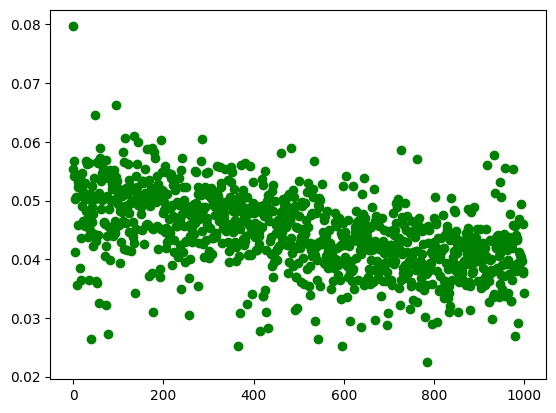

In [18]:
plt.plot(losses, 'go')
plt.show()